In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [3]:
# groupby() without as_index
first_even = example_df.groupby('even').first()
print (first_even)
print (first_even['even']) # Causes an error. 'even' is no longer a column in the DataFrame

       value  above_three
even                     
False      1        False
True       2        False


KeyError: 'even'

In [4]:
# groupby() with as_index=False
first_even = example_df.groupby('even', as_index=False).first()
print (first_even)
print('')
print (first_even['even']) # Now 'even' is still a column in the DataFrame

    even  value  above_three
0  False      1        False
1   True      2        False

0    False
1     True
Name: even, dtype: bool


In [5]:
filename = 'datasets/nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

In [6]:
data_by_location = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()

In [7]:
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

In [10]:
scaled_entries = (data_by_location['ENTRIESn_hourly'] / data_by_location['ENTRIESn_hourly'].std())

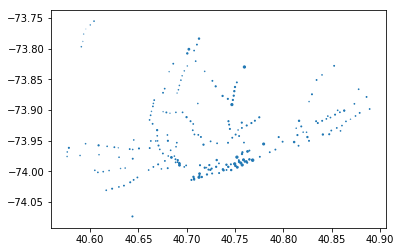

In [11]:
## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], s=scaled_entries)